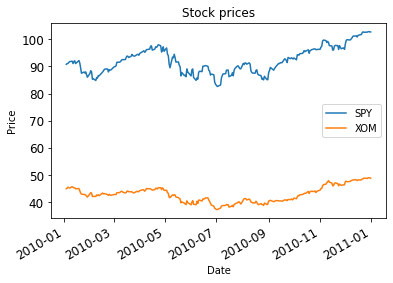

                 SPY       XOM  Cumulative_return_SPY  Cumulative_return_XOM
2010-12-27  0.000398 -0.002595               0.138553               0.096994
2010-12-28  0.001433  0.005616               0.139986               0.102610
2010-12-29  0.000715 -0.000681               0.140701               0.101929
2010-12-30 -0.001588 -0.000136               0.139113               0.101793
2010-12-31  0.000239 -0.003272               0.139351               0.098521


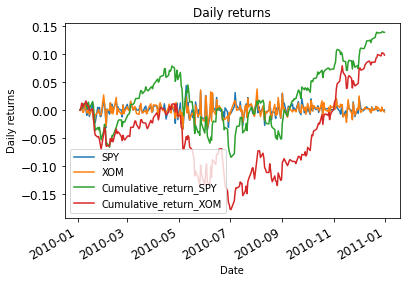

In [24]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join("{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = df.copy()
    df.fillna(method='ffill', inplace=True)
    daily_returns[1:] = (df[1:] / df[:-1].values) -1
    daily_returns.iloc[0, :] = 0
    
    #print(daily_returns.head())
    daily_returns['Cumulative_return_SPY'] = np.cumsum(daily_returns['SPY'])
    daily_returns['Cumulative_return_XOM'] = np.cumsum(daily_returns['XOM'])
    print(daily_returns.tail())
    return daily_returns


def test_run():
    # Read data
    dates = pd.date_range('2010-01-01', '2010-12-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()